# Objectives

In this notebook, results of the case study conducted using the KITTI dataset is aggregated and summarized.

The aggregated data is used in the paper: \link{}.

In [2]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('/app/src')

from src.internal.extended_common import (
    CoordinateFrame,
    Pose, State,
    ExtendedConfig,
    KITTI_SEQUENCE_TO_DATE,
    KITTI_SEQUENCE_TO_DRIVE
)
from src.internal.dataset import OXTS_GPSDataReader
from src.common.datatypes import State, Pose
from src.utils.geometric_transformer import GeometryTransformer, TransformationField
from src.utils.geometric_transformer.base_geometric_transformer import BaseGeometryTransformer


In [3]:
result_csv_filename = '/app/outputs/KITTI/specific_setups/results/kitti_experiment_results.csv'
results_df = pd.read_csv(result_csv_filename)

In [4]:
results_df

,sequence,filter_type,motion_model,sensor,vo_estimation_type,mae,ate,rpe_m,rpe_deg,avg_inference_time_prediction_step,avg_inference_time_correction_step
0,7,ekf,velocity,imu_vo_pos,2d3d,6.042096,15.018938,0.213301,0.691018,0.000232,0.000213
1,7,ekf,velocity,imu_gps_vo_pos,2d3d,0.941051,2.231962,0.166016,0.843373,0.000248,0.000247
2,7,ukf,velocity,imu_vo_pos,2d3d,6.001444,14.972005,0.112450,0.324535,0.000693,0.000408
3,7,ukf,velocity,imu_gps_vo_pos,2d3d,2.303639,6.092750,0.061083,0.379400,0.000721,0.000428
4,7,pf,velocity,imu_vo_pos,2d3d,3693.997354,122.003901,0.719831,1.869731,0.026506,0.025289
5,7,pf,velocity,imu_gps_vo_pos,2d3d,2831.433727,121.188363,0.583245,2.334564,0.026627,0.025467
6,7,enkf,velocity,imu_vo_pos,2d3d,6.392431,19.115135,0.729628,2.409775,0.001781,0.000589
7,7,enkf,velocity,imu_gps_vo_pos,2d3d,1.331022,10.579612,0.823273,2.704700,0.001783,0.000519
8,7,ckf,velocity,imu_vo_pos,2d3d,6.000739,14.978976,0.112526,0.179515,0.000681,0.000444
9,7,ckf,velocity,imu_gps_vo_pos,2d3d,2.259292,5.934878,0.060685,0.204676,0.000693,0.000407


In [5]:
vo_df = results_df[results_df['sensor'] == 'imu_vo_pos']
vo_gps_df = results_df[results_df['sensor'] == 'imu_gps_vo_pos']

In [6]:
vo_df

,sequence,filter_type,motion_model,sensor,vo_estimation_type,mae,ate,rpe_m,rpe_deg,avg_inference_time_prediction_step,avg_inference_time_correction_step
0,7,ekf,velocity,imu_vo_pos,2d3d,6.042096,15.018938,0.213301,0.691018,0.000232,0.000213
2,7,ukf,velocity,imu_vo_pos,2d3d,6.001444,14.972005,0.112450,0.324535,0.000693,0.000408
4,7,pf,velocity,imu_vo_pos,2d3d,3693.997354,122.003901,0.719831,1.869731,0.026506,0.025289
6,7,enkf,velocity,imu_vo_pos,2d3d,6.392431,19.115135,0.729628,2.409775,0.001781,0.000589
8,7,ckf,velocity,imu_vo_pos,2d3d,6.000739,14.978976,0.112526,0.179515,0.000681,0.000444


In [7]:
vo_gps_df

,sequence,filter_type,motion_model,sensor,vo_estimation_type,mae,ate,rpe_m,rpe_deg,avg_inference_time_prediction_step,avg_inference_time_correction_step
1,7,ekf,velocity,imu_gps_vo_pos,2d3d,0.941051,2.231962,0.166016,0.843373,0.000248,0.000247
3,7,ukf,velocity,imu_gps_vo_pos,2d3d,2.303639,6.092750,0.061083,0.379400,0.000721,0.000428
5,7,pf,velocity,imu_gps_vo_pos,2d3d,2831.433727,121.188363,0.583245,2.334564,0.026627,0.025467
7,7,enkf,velocity,imu_gps_vo_pos,2d3d,1.331022,10.579612,0.823273,2.704700,0.001783,0.000519
9,7,ckf,velocity,imu_gps_vo_pos,2d3d,2.259292,5.934878,0.060685,0.204676,0.000693,0.000407


In [18]:
error_columns = ['ate', 'rpe_m', 'rpe_deg']
error_df = -(vo_df[error_columns].values - vo_gps_df[error_columns].values) / vo_df[error_columns].values * 100
pd.DataFrame(error_df, columns=["delta_ate", "delta_rpe_m", "delta_rpe_deg"], index=["EKF", "UKF", "PF", "EnKF", "CKF"])

,delta_ate,delta_rpe_m,delta_rpe_deg
EKF,-85.139016,-22.168158,22.047949
UKF,-59.305721,-45.679695,16.905820
PF,-0.668453,-18.974706,24.860971
EnKF,-44.653220,12.834725,12.238698
CKF,-60.378614,-46.070268,14.016248


In [ ]:
vo_df['ate'].values

array([ 15.01893789,  14.97200513, 122.00390094,  19.11513513,
        14.97897587])

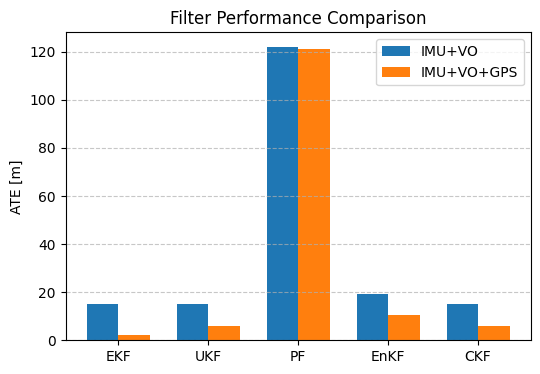

In [19]:
filters = ["EKF", "UKF", "PF", "EnKF", "CKF"]
imu_vo = vo_df['ate'].values       # Example ATE (m)
imu_vo_gps = vo_gps_df['ate'].values   # Example ATE (m)

x = np.arange(len(filters))
width = 0.35

fig, ax = plt.subplots(figsize=(6,4))
rects1 = ax.bar(x - width/2, imu_vo, width, label="IMU+VO")
rects2 = ax.bar(x + width/2, imu_vo_gps, width, label="IMU+VO+GPS")

ax.set_ylabel("ATE [m]")
ax.set_title("Filter Performance Comparison")
ax.set_xticks(x)
ax.set_xticklabels(filters)
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.7)

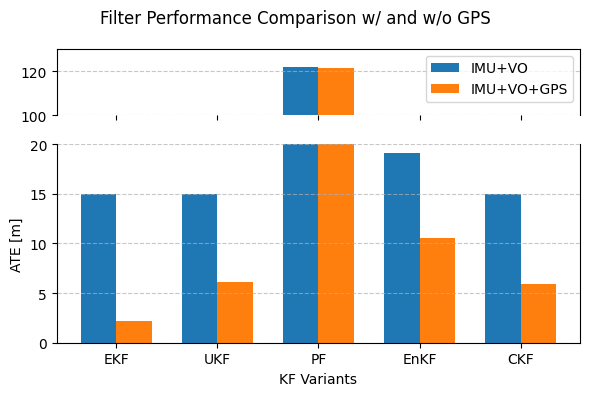

In [20]:
imu_vo = vo_df['ate'].values       # Example ATE (m)
imu_vo_gps = vo_gps_df['ate'].values   # Example ATE (m)

x = np.arange(len(filters))
width = 0.35

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6,4),
                               gridspec_kw={'height_ratios':[1,3]})

# Top plot (zoomed in on PF outlier)
rects1 = ax1.bar(x - width / 2, imu_vo, width, label="IMU+VO")
rects2 = ax1.bar(x + width / 2, imu_vo_gps, width, label="IMU+VO+GPS")

ax1.set_ylim(100, 130)  # show PF range
ax1.spines['bottom'].set_visible(False)

# Bottom plot (show good filters clearly)
rects1 = ax2.bar(x - width / 2, imu_vo, width, label="IMU+VO")
rects2 = ax2.bar(x + width / 2, imu_vo_gps, width, label="IMU+VO+GPS")
ax2.set_ylim(0, 20)  # zoomed in on stable filters
ax2.spines['top'].set_visible(False)
ax1.grid(axis="y", linestyle="--", alpha=0.7)

# Diagonal lines to indicate break
# d = .01
# kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
# ax1.plot((-d,+d), (-d,+d), **kwargs)
# ax1.plot((1-d,1+d), (-d,+d), **kwargs)

# kwargs.update(transform=ax2.transAxes)
# ax2.plot((-d,+d), (1-d,1+d), **kwargs)
# ax2.plot((1-d,1+d), (1-d,1+d), **kwargs)

ax2.set_xticks(x)
ax2.set_xticklabels(filters)
ax2.set_ylabel("ATE [m]")
ax2.set_xlabel("KF Variants")
ax2.grid(axis="y", linestyle="--", alpha=0.7)
ax1.legend()
plt.suptitle("Filter Performance Comparison w/ and w/o GPS")
plt.tight_layout()
plt.show()

## Inference speed

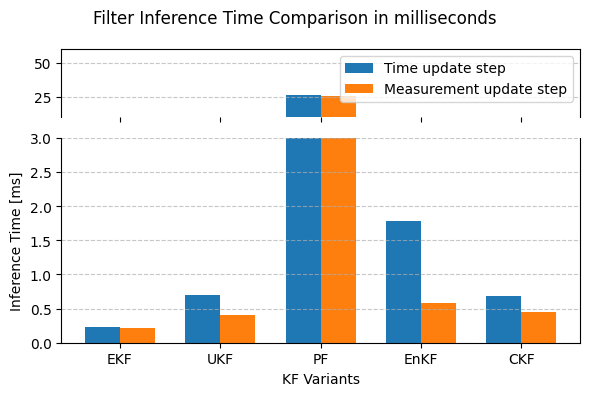

In [22]:
filters = ["EKF", "UKF", "PF", "EnKF", "CKF"]
prediction_step = vo_df['avg_inference_time_prediction_step'].values * 1000
correction_step = vo_df['avg_inference_time_correction_step'].values * 1000

x = np.arange(len(filters))
width = 0.35

fig, (ax1, ax2) = plt.subplots(2,
                               1,
                               sharex=True,
                               figsize=(6, 4),
                               gridspec_kw={'height_ratios': [1, 3]})

lower_limit = 0.01 * 1000
upper_limit = 0.06 * 1000

lower_limit2 = 0
upper_limit2 = 0.003 * 1000

# Top plot (zoomed in on PF outlier)
rects1 = ax1.bar(x - width / 2, prediction_step, width, label="Time update step")
rects2 = ax1.bar(x + width / 2, correction_step, width, label="Measurement update step")

ax1.set_ylim(lower_limit, upper_limit)  # show PF range
ax1.spines['bottom'].set_visible(False)

# Bottom plot (show good filters clearly)
rects1 = ax2.bar(x - width / 2, prediction_step, width, label="Time update step")
rects2 = ax2.bar(x + width / 2, correction_step, width, label="Measurement update step")
ax2.set_ylim(lower_limit2, upper_limit2)  # zoomed in on stable filters
ax2.spines['top'].set_visible(False)
ax1.grid(axis="y", linestyle="--", alpha=0.7)

# Diagonal lines to indicate break
# d = .01
# kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
# ax1.plot((-d,+d), (-d,+d), **kwargs)
# ax1.plot((1-d,1+d), (-d,+d), **kwargs)

# kwargs.update(transform=ax2.transAxes)
# ax2.plot((-d,+d), (1-d,1+d), **kwargs)
# ax2.plot((1-d,1+d), (1-d,1+d), **kwargs)

ax2.set_xticks(x)
ax2.set_xticklabels(filters)
ax2.set_ylabel("Inference Time [ms]")
ax2.set_xlabel("KF Variants")
ax2.grid(axis="y", linestyle="--", alpha=0.7)
ax1.legend()
plt.suptitle("Filter Inference Time Comparison in milliseconds")
plt.tight_layout()
plt.show()

## Draw trajectories

### Group by sensor

In [55]:
ekf_vo = pd.read_csv(
    '/app/outputs/KITTI/specific_setups/results/seq07/ekf_velocity/imu_vo_pos/estimated_pose.txt',
    header=None,
    sep=' ').values.reshape(-1, 3, 4)
ukf_vo = pd.read_csv(
    '/app/outputs/KITTI/specific_setups/results/seq07/ukf_velocity/imu_vo_pos/estimated_pose.txt',
    header=None,
    sep=' ').values.reshape(-1, 3, 4)
pf_vo = pd.read_csv(
    '/app/outputs/KITTI/specific_setups/results/seq07/pf_velocity/imu_vo_pos/estimated_pose.txt',
    header=None,
    sep=' ').values.reshape(-1, 3, 4)
enkf_vo = pd.read_csv(
    '/app/outputs/KITTI/specific_setups/results/seq07/enkf_velocity/imu_vo_pos/estimated_pose.txt',
    header=None,
    sep=' ').values.reshape(-1, 3, 4)
ckf_vo = pd.read_csv(
    '/app/outputs/KITTI/specific_setups/results/seq07/ckf_velocity/imu_vo_pos/estimated_pose.txt',
    header=None,
    sep=' ').values.reshape(-1, 3, 4)

In [57]:
ekf_vo_gps = pd.read_csv(
    '/app/outputs/KITTI/specific_setups/results/seq07/ekf_velocity/imu_gps_vo_pos/estimated_pose.txt',
    header=None,
    sep=' ').values.reshape(-1, 3, 4)
ukf_vo_gps = pd.read_csv(
    '/app/outputs/KITTI/specific_setups/results/seq07/ukf_velocity/imu_gps_vo_pos/estimated_pose.txt',
    header=None,
    sep=' ').values.reshape(-1, 3, 4)
pf_vo_gps = pd.read_csv(
    '/app/outputs/KITTI/specific_setups/results/seq07/pf_velocity/imu_gps_vo_pos/estimated_pose.txt',
    header=None,
    sep=' ').values.reshape(-1, 3, 4)
enkf_vo_gps = pd.read_csv(
    '/app/outputs/KITTI/specific_setups/results/seq07/enkf_velocity/imu_gps_vo_pos/estimated_pose.txt',
    header=None,
    sep=' ').values.reshape(-1, 3, 4)
ckf_vo_gps = pd.read_csv(
    '/app/outputs/KITTI/specific_setups/results/seq07/ckf_velocity/imu_gps_vo_pos/estimated_pose.txt',
    header=None,
    sep=' ').values.reshape(-1, 3, 4)

In [117]:
gt = pd.read_csv(
    '/app/outputs/KITTI/specific_setups/results/seq07/ekf_velocity/imu_vo_pos/ground_truth_pose.txt',
    header=None,
    sep=' ').values.reshape(-1, 3, 4)

vo = pd.read_csv(
    '/app/outputs/vo_estimates/pose_estimation_2d3d_improved/absolute_pose/2011_09_30/0027/data.csv',
    header=None).values.reshape(-1, 3, 4)

In [118]:
sequence = '07'
drive = KITTI_SEQUENCE_TO_DRIVE.get(sequence, '2011_09_26_drive_0005_sync')
date = KITTI_SEQUENCE_TO_DATE.get(sequence, '2011_09_26')

gps_data_reader = OXTS_GPSDataReader(
    root_path='/app/data/KITTI/',
    date=date,
    drive=drive
)
config = ExtendedConfig(config_filepath="/app/configs/kitti_config.yaml")
transformer = GeometryTransformer(config.hardware)
state = State(p=np.zeros((3, 1)), v=np.zeros((3, 1)), q=np.array([1, 0, 0, 0]).reshape(-1, 1), b_w=np.zeros((3, 1)), b_a=np.zeros((3, 1)))

gps_data = iter(gps_data_reader)
gps_inertial = []
for item in gps_data:
    z = np.array([item.lon, item.lat, item.alt])
    _gps = transformer.transform(
        fields=TransformationField(
            state=state,
            value=z,
            coord_from=CoordinateFrame.GPS,
            coord_to=CoordinateFrame.INERTIAL,
        )
    )
    gps_inertial.append(_gps.flatten())

gps_inertial = np.array(gps_inertial)
gps_inertial.shape

gt_inertial = []
for pos in gt:
    _gt = transformer.transform(
        fields=TransformationField(
            state=state,
            value=pos,
            coord_from=CoordinateFrame.STEREO_LEFT,
            coord_to=CoordinateFrame.INERTIAL,
        )
    )
    gt_inertial.append(_gt[:3, 3].flatten())

gt_inertial = np.array(gt_inertial)

vo_inertial = []
for pos in vo:
    _vo = transformer.transform(fields=TransformationField(
        state=state,
        value=pos,
        coord_from=CoordinateFrame.STEREO_LEFT,
        coord_to=CoordinateFrame.INERTIAL,
    ))
    vo_inertial.append(_vo[:3, 3].flatten())
vo_inertial = np.array(vo_inertial)
vo_inertial.shape

oxts_imu
kitti_stereo
kitti_vo


(1105, 3)

In [119]:
def get_inertial_positions(poses):
    inertial_positions = []
    for pos in poses:
        _pos = transformer.transform(fields=TransformationField(
            state=state,
            value=pos,
            coord_from=CoordinateFrame.STEREO_LEFT,
            coord_to=CoordinateFrame.INERTIAL,
        ))
        inertial_positions.append(_pos[:3, 3].flatten())
    return np.array(inertial_positions)


ekf_vo_inertial = get_inertial_positions(ekf_vo)
ukf_vo_inertial = get_inertial_positions(ukf_vo)
pf_vo_inertial = get_inertial_positions(pf_vo)
enkf_vo_inertial = get_inertial_positions(enkf_vo)
ckf_vo_inertial = get_inertial_positions(ckf_vo)
ekf_vo_gps_inertial = get_inertial_positions(ekf_vo_gps)
ukf_vo_gps_inertial = get_inertial_positions(ukf_vo_gps)
pf_vo_gps_inertial = get_inertial_positions(pf_vo_gps)
enkf_vo_gps_inertial = get_inertial_positions(enkf_vo_gps)
ckf_vo_gps_inertial = get_inertial_positions(ckf_vo_gps)

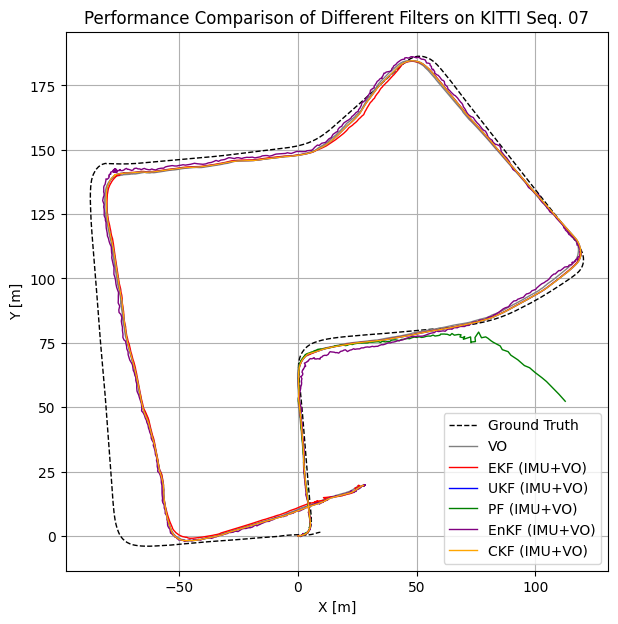

In [131]:
pf_before_diverge = pf_vo_inertial[:250]

plt.figure(figsize=(7, 7))
x, y = gt_inertial[:, 0], gt_inertial[:, 1]
plt.plot(x, y, label='Ground Truth', color='black', linestyle='--', linewidth=1)
x, y = vo_inertial[:, 0], vo_inertial[:, 1]
plt.plot(x, y, label='VO', linewidth=1, color='gray', alpha=1.0)

x, y = ekf_vo_inertial[:, 0], ekf_vo_inertial[:, 1]
plt.plot(x, y, label='EKF (IMU+VO)', color='red', linewidth=1)
x, y = ukf_vo_inertial[:, 0], ukf_vo_inertial[:, 1]
plt.plot(x, y, label='UKF (IMU+VO)', color='blue', linewidth=1)
x, y = pf_before_diverge[:, 0], pf_before_diverge[:, 1]
plt.plot(x, y, label='PF (IMU+VO)', color='green', linewidth=1)
x, y = enkf_vo_inertial[:, 0], enkf_vo_inertial[:, 1]
plt.plot(x, y, label='EnKF (IMU+VO)', color='purple', linewidth=1)
x, y = ckf_vo_inertial[:, 0], ckf_vo_inertial[:, 1]
plt.plot(x, y, label='CKF (IMU+VO)', color='orange', linewidth=1)

plt.grid()
plt.legend()
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.title('Performance Comparison of Different Filters on KITTI Seq. 07')
plt.show()

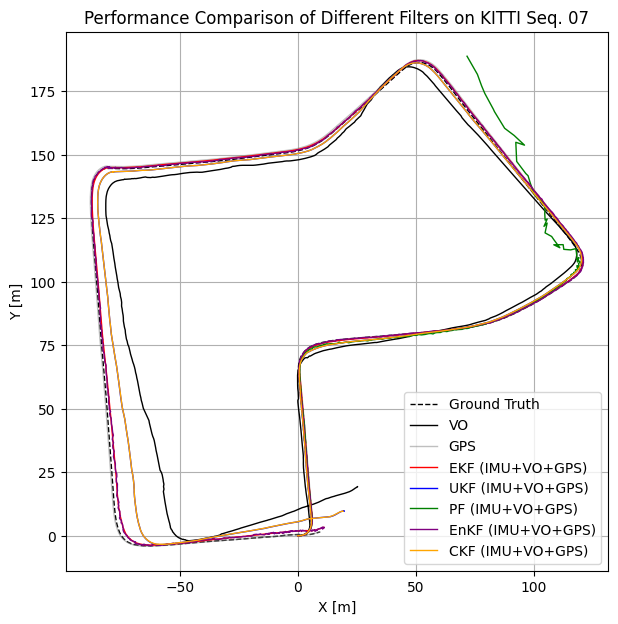

In [132]:
pf_before_diverge = pf_vo_gps_inertial[:360]

plt.figure(figsize=(7, 7))
x, y = gt_inertial[:, 0], gt_inertial[:, 1]
plt.plot(x, y, label='Ground Truth', color='black', linestyle='--', linewidth=1)
x, y = vo_inertial[:, 0], vo_inertial[:, 1]
plt.plot(x, y, label='VO', linewidth=1, color='black', alpha=1.0)
x, y = gps_inertial[:, 0], gps_inertial[:, 1]
plt.plot(x, y, label='GPS', linewidth=1, color='gray', alpha=0.5)

x, y = ekf_vo_gps_inertial[:, 0], ekf_vo_gps_inertial[:, 1]
plt.plot(x, y, label='EKF (IMU+VO+GPS)', color='red', linewidth=1)
x, y = ukf_vo_gps_inertial[:, 0], ukf_vo_gps_inertial[:, 1]
plt.plot(x, y, label='UKF (IMU+VO+GPS)', color='blue', linewidth=1)
x, y = pf_before_diverge[:, 0], pf_before_diverge[:, 1]
plt.plot(x, y, label='PF (IMU+VO+GPS)', color='green', linewidth=1)
x, y = enkf_vo_gps_inertial[:, 0], enkf_vo_gps_inertial[:, 1]
plt.plot(x, y, label='EnKF (IMU+VO+GPS)', color='purple', linewidth=1)
x, y = ckf_vo_gps_inertial[:, 0], ckf_vo_gps_inertial[:, 1]
plt.plot(x, y, label='CKF (IMU+VO+GPS)', color='orange', linewidth=1)

plt.grid()
plt.legend()
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.title('Performance Comparison of Different Filters on KITTI Seq. 07')
plt.show()